<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [356]:
%matplotlib inline
import math
import matplotlib
import networkx as nx
import networkx.algorithms.community
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from tqdm import tqdm
import time
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [9]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
seed = random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,0,seed=seed)
RGER = nx.gnm_random_graph(n,M,seed=seed) 
RGG = nx.random_geometric_graph(n,R,seed=seed)
RG_Gilbert = nx.gnp_random_graph(n, p, seed=seed)
SF = nx.barabasi_albert_graph(n,d,seed=seed)
SW = nx.watts_strogatz_graph(n,d,p,seed=seed) 

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

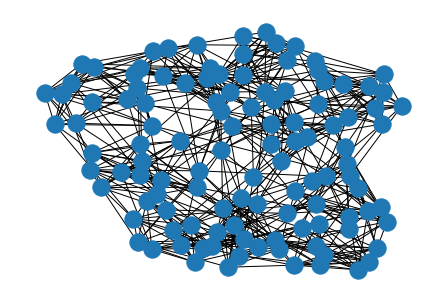

In [41]:
#football network
football=nx.read_gml(r"football.gml")
nx.draw(football, with_labels = False)

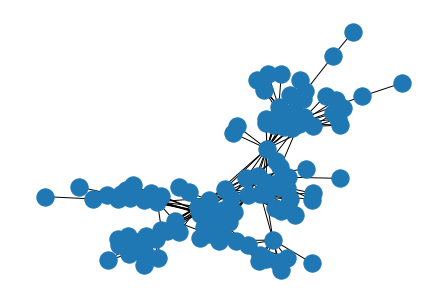

In [42]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
nx.draw(got, with_labels = False)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

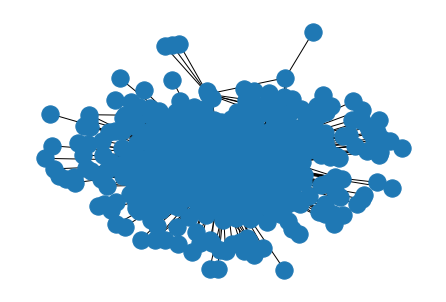

In [12]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
eu = sorted([eu.subgraph(c).copy() for c in nx.connected_components(eu)], key=len, reverse=True)[0]
eu.remove_edges_from(nx.selfloop_edges(eu))
nx.draw(eu)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

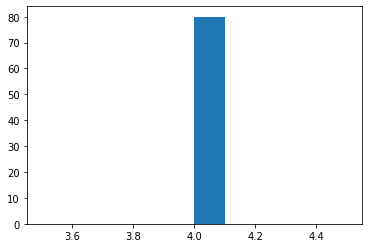

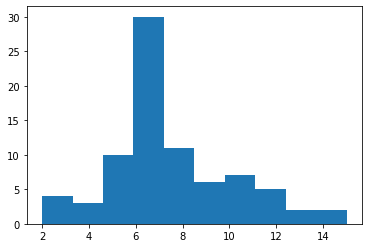

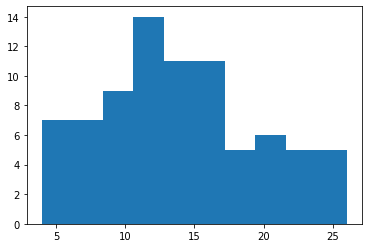

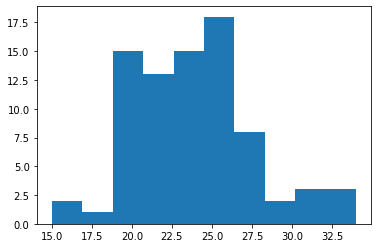

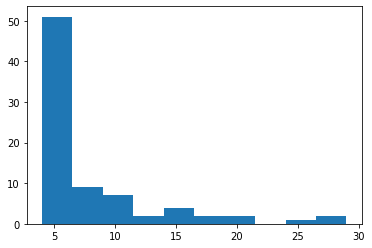

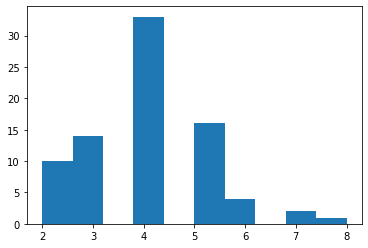

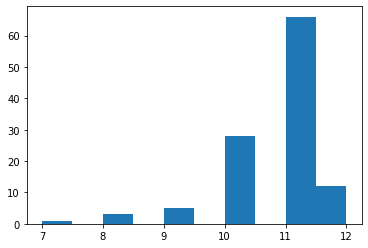

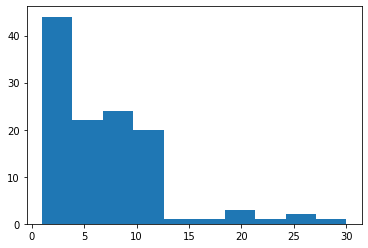

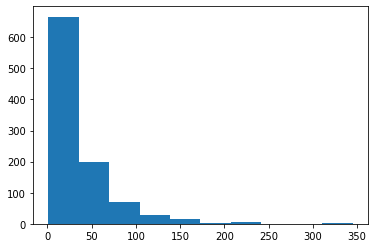

'Ο βαθμός κόσμου του football δεν έχει κάποια αντιστοιχία με τα συνθετικά δίκτυα με βάση το seed μου ενώ παράλληλα ο got και ο eu φέρνουν σε scale-free δίκτυο με βάση τον βαθμό κόμβου.\nO football είναι σαν ανάποδο scale-free χωρίς να γνωρίζω τι σημαίνει αυτό'

In [24]:
#Από την προηγούμενη εργασία
def find_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

find_degree(REG)
find_degree(RGER)
find_degree(RGG)
find_degree(RG_Gilbert)
find_degree(SF)
find_degree(SW)

#Μη συνθετικοί κόμβοι
find_degree(football)
find_degree(got)
find_degree(eu)

"""Ο βαθμός κόσμου του football δεν έχει κάποια αντιστοιχία με τα συνθετικά δίκτυα με βάση το seed μου ενώ παράλληλα ο got και ο eu φέρνουν σε scale-free δίκτυο με βάση τον βαθμό κόμβου.
O football είναι σαν ανάποδο scale-free χωρίς να γνωρίζω τι σημαίνει αυτό"""

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [ ]:
def plot_distrib(G,cc):
    fig, ax1 = plt.subplots(ncols=1)
    ax1.hist(cc.values())
    ax1.set_xlabel('Clustering')
    ax1.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
def cc(G):
    cc = nx.clustering(G)
    df = pd.DataFrame.from_dict(cc,orient='index', dtype='float', columns=['Coefficients'])
    plot_distrib(G,cc)
    avg = nx.average_clustering(G)
    print(f"Average clustering coefficient: {avg}")
    print(f"Variance of clustering coefficients: {df.var(axis=0)[0]}")
    #We get the minimum and the maximum coefficient from the graphs
    mincoefficient = df.min(axis=0)[0]
    maxcoefficient = df.max(axis=0)[0]
    #Here we extract the values we want and remove the NaN that pandas creates
    minNodes = df.where(df==mincoefficient)
    minNodes = minNodes[~minNodes['Coefficients'].isnull()]
    maxNodes = df.where(df==maxcoefficient)
    maxNodes = maxNodes[~maxNodes['Coefficients'].isnull()]
    
    print(f"nodes with minimum clustering coefficient: {minNodes.index.tolist()}")
    print(f"nodes with maximum clustering coefficient: {maxNodes.index.tolist()}")
    
    
cc(REG)
cc(RGER)
cc(RGG)
cc(RG_Gilbert)
cc(SF)
cc(SW)

#Μη συνθετικοί κόμβοι
cc(football)
cc(got)
cc(eu)

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [ ]:
def plot_distrib(G,cl):
    fig, ax1 = plt.subplots(ncols=1)
    ax1.hist(cl.values())
    ax1.set_xlabel('Closeness centrality')
    ax1.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def find_closeness(G):
    cl = nx.closeness_centrality(G)
    plot_distrib(G,cl)
    df = pd.DataFrame.from_dict(cl,orient='index', dtype='float', columns=['Centrality'])
    mean = df.mean()[0]
    var = df.var()[0]
    print(f"mean closeness centrality : {mean}, variance: {var}")
    #return df

find_closeness(REG)
find_closeness(RGER)
find_closeness(RGG)
find_closeness(RG_Gilbert)
find_closeness(SF)
find_closeness(SW)

#Μη συνθετικοί κόμβοι
find_closeness(football)
find_closeness(got)
find_closeness(eu)

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [34]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [175]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [306]:
def get_NG_communities(G):
    G, G_map = conv2int(G, 0)
    NG = nx.community.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= 50, NG)
    i=0
    for communities in tqdm(limited):
        if i==0:
            max_modularity = nx.community.modularity(G,communities)
            seq, max_performance = nx.community.partition_quality(G, communities)
            max_mod_comm = communities
            max_perf_comm = communities
        else:
            if (nx.community.modularity(G,communities) > max_modularity):    
                max_modularity = nx.community.modularity(G,communities)
                max_mod_comm = communities
            
            seq, perf = nx.community.partition_quality(G, communities)
            if (perf > max_performance):
                max_performance = perf
                max_perf_comm = communities
        i=i+1
    return max_mod_comm, max_perf_comm

max_mod_GN_REG, max_perf_GN_REG= get_NG_communities(REG)
max_mod_GN_RGER, max_perf_GN_RGER = get_NG_communities(RGER)
max_mod_GN_RGG, max_perf_GN_RGG = get_NG_communities(RGG)
max_mod_GN_RG_Gilbert, max_perf_GN_RG_Gilbert = get_NG_communities(RG_Gilbert)
max_mod_GN_SF, max_perf_GN_SF = get_NG_communities(SF)
max_mod_GN_SW, max_perf_GN_SW = get_NG_communities(SW)
#Μη συνθετικά
max_mod_GN_football, max_perf_GN_football = get_NG_communities(football)
max_mod_GN_got, max_perf_GN_got = get_NG_communities(got)
max_mod_GN_eu, max_perf_GN_eu = get_NG_communities(eu)

49it [00:00, 90.40it/s] 
49it [00:03, 14.64it/s]
49it [00:04, 10.18it/s]
49it [00:19,  2.57it/s]
49it [00:03, 16.20it/s]
49it [00:00, 77.15it/s]
49it [00:06,  7.84it/s]
49it [00:02, 19.04it/s]
49it [07:49,  9.58s/it]


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,50$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [161]:
def get_spectral_comms(G):
    with tqdm(total = 48) as progressbar:
        #nG = graph    
        nG, G_map = conv2int(G, 0)
        adj_mat = nx.convert_matrix.to_numpy_array(nG)
        for n in range(2,50):
            sc = SpectralClustering(n, affinity='precomputed',random_state=seed)
            clusters = sc.fit_predict(adj_mat)
            #Convert cluster labels to networkx readable format
            #perform similar actions as in girvan newman and return the max metrics
            communitylist = []
            for i in range(0,clusters.max()+1):
                args = np.argwhere(clusters==i)
                communitylist.append(set(args.flatten()))
            communities = tuple(communitylist)
            #Let's define the max. if n==2 means first iteration of SC
            #Following logic similar to Newman Girvan func
            if (n==2):
                max_modularity = nx.community.modularity(nG,communities)
                seq, max_performance = nx.community.partition_quality(nG, communities)
                max_mod_comm = communities
                max_perf_comm = communities
            else:
                if (nx.community.modularity(nG,communities) > max_modularity):    
                    max_modularity = nx.community.modularity(nG,communities)
                    max_mod_comm = communities
                seq, perf = nx.community.partition_quality(nG, communities)
                if (perf > max_performance):
                    max_performance = perf
                    max_perf_comm = communities
            progressbar.update(1)
    return max_mod_comm, max_perf_comm
    
max_mod_spectral_REG, max_perf_spectral_REG = get_spectral_comms(REG)
max_mod_spectral_RGER, max_perf_spectral_RGER = get_spectral_comms(RGER)
max_mod_spectral_RGG, max_perf_spectral_RGG = get_spectral_comms(RGG)
max_mod_spectral_RG_Gilbert, max_perf_spectral_RG_Gilbert = get_spectral_comms(RG_Gilbert)
max_mod_spectral_SF, max_perf_spectral_SF = get_spectral_comms(SF)
max_mod_spectral_SW, max_perf_spectral_SW = get_spectral_comms(SW)
#Μη συνθετικά
max_mod_spectral_football, max_perf_spectral_football = get_spectral_comms(football)
max_mod_spectral_got, max_perf_spectral_got = get_spectral_comms(got)
max_mod_spectral_eu, max_perf_spectral_eu = get_spectral_comms(eu)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:23<00:00,  2.06it/s]


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [305]:
def get_MM_communities(G):
    G, G_map = conv2int(G, 0)
    for i in tqdm(range(1,50)):
        communities = nx.community.greedy_modularity_communities(G,n_communities=i)
        if i==1:
            max_modularity = nx.community.modularity(G,communities)
            seq, max_performance = nx.community.partition_quality(G, communities)
            max_mod_comm = communities
            max_perf_comm = communities
        else:
            if (nx.community.modularity(G,communities) > max_modularity):    
                max_modularity = nx.community.modularity(G,communities)
                max_mod_comm = communities
            seq, perf = nx.community.partition_quality(G, communities)
            if (perf > max_performance):
                max_performance = perf
                max_perf_comm = communities
    return max_mod_comm, max_perf_comm

max_mod_MM_REG, max_perf_MM_REG = get_MM_communities(REG)
max_mod_MM_RGER, max_perf_MM_RGER = get_MM_communities(RGER)
max_mod_MM_RGG, max_perf_MM_RGG = get_MM_communities(RGG)
max_mod_MM_RG_Gilbert, max_perf_MM_RG_Gilbert = get_MM_communities(RG_Gilbert)
max_mod_MM_SF, max_perf_MM_SF = get_MM_communities(SF)
max_mod_MM_SW, max_perf_MM_SW = get_MM_communities(SW)
#Μη συνθετικά
max_mod_MM_football, max_perf_MM_football = get_MM_communities(football)
max_mod_MM_got, max_perf_MM_got = get_MM_communities(got)
max_mod_MM_eu, max_perf_MM_eu = get_MM_communities(eu)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [02:45<00:00,  3.37s/it]


#### Οπτικοποίηση κοινοτήτων American College Football

Girvan newman: Most modular communities
Number of communities 10


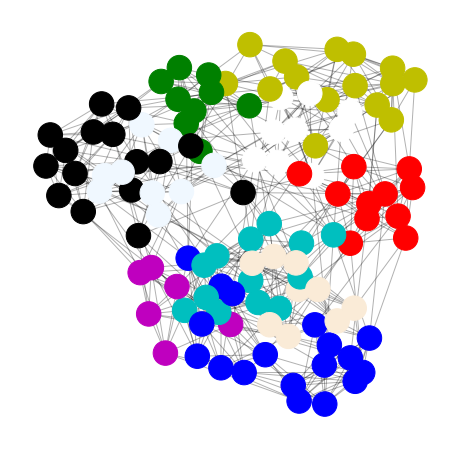

Girvan newman: Most performant communities
Number of communities 17


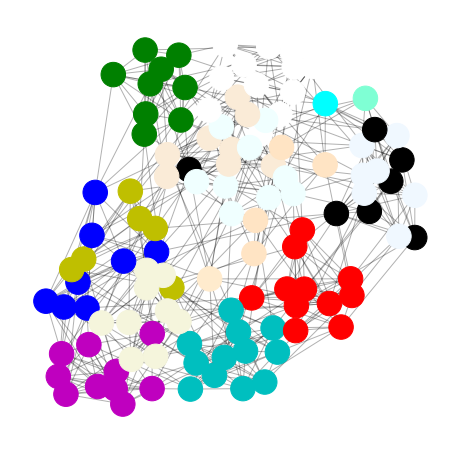

Spectral clustering: Most modular communities
Number of communities 11


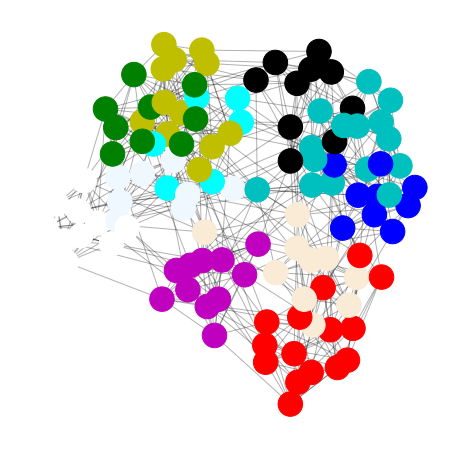

Spectral clustering: Most performant communities
Number of communities 15


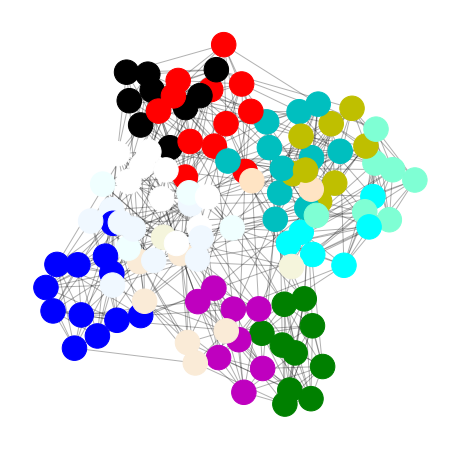

Modularity Maximization: Most modular communities
Number of communities 6


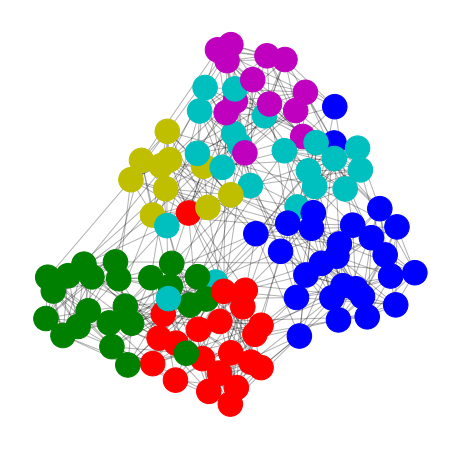

Modularity Maximization: Most performant communities
Number of communities 49


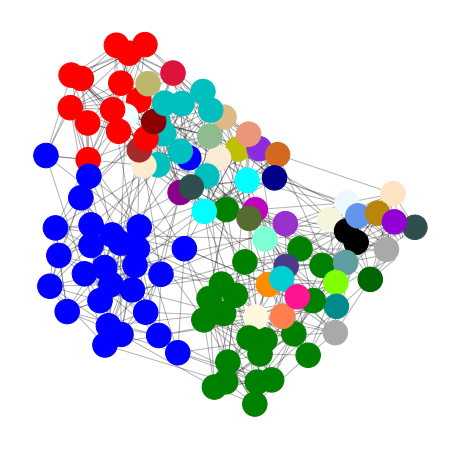

In [347]:
def convert_partition(G,communities):
    """
    G: original graph e.g. got
    communities: list of sets/frozensets returned by e.g newman-girvan
    """
    nodes = G.nodes
    assignment = dict()
    for node in nodes:
        for community in range(0,len(communities)):
            if node in communities[community]:
                assignment[node]=community
    return assignment
            
    

def plot_communities(G,partition):
    pos = nx.spring_layout(G)  # compute graph layout
    plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
    plt.axis('off')
    partition = convert_partition(G,partition)
    partval=[]
    for val in list(partition.values()):
        partval.append(colors[val])
    nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=partval)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)


football,fmap = conv2int(football,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_football)}')
plot_communities(football, max_mod_GN_football)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_football)}')
plot_communities(football, max_perf_GN_football)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_football)}')
plot_communities(football, max_mod_spectral_football)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_football)}')
plot_communities(football, max_perf_spectral_football)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_football)}')
plot_communities(football, max_mod_MM_football)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_football)}')
plot_communities(football, max_perf_MM_football)

#### Οπτικοποίηση κοινοτήτων Game of Thrones

Girvan newman: Most modular communities
Number of communities 8


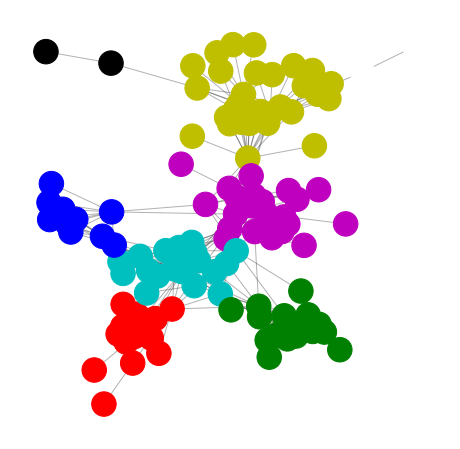

Girvan newman: Most performant communities
Number of communities 50


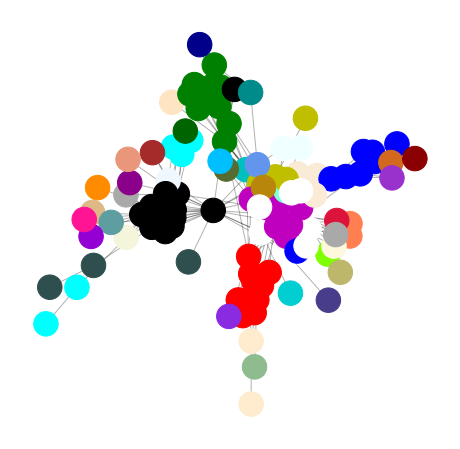

Spectral clustering: Most modular communities
Number of communities 7


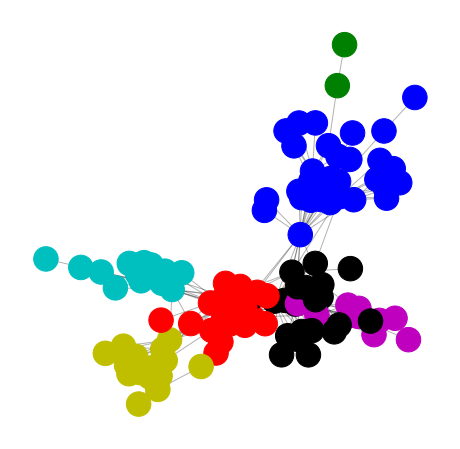

Spectral clustering: Most performant communities
Number of communities 48


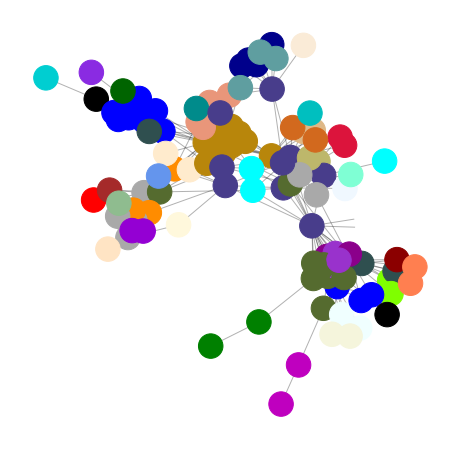

Modularity Maximization: Most modular communities
Number of communities 5


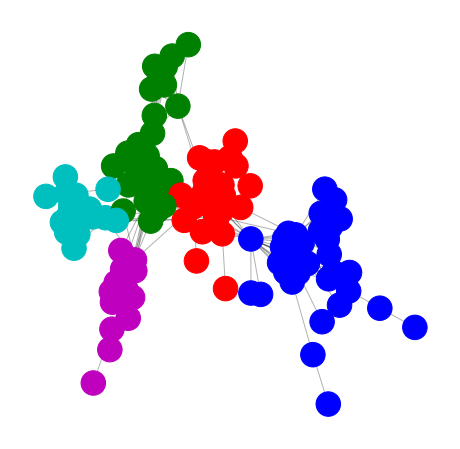

Modularity Maximization: Most performant communities
Number of communities 42


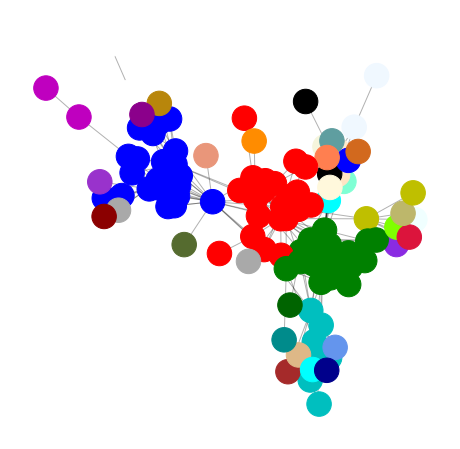

In [348]:
got,gmap = conv2int(got,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_got)}')
plot_communities(got, max_mod_GN_got)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_got)}')
plot_communities(got, max_perf_GN_got)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_got)}')
plot_communities(got, max_mod_spectral_got)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_got)}')
plot_communities(got, max_perf_spectral_got)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_got)}')
plot_communities(got, max_mod_MM_got)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_got)}')
plot_communities(got, max_perf_MM_got)

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

Girvan newman: Most modular communities
Number of communities 2


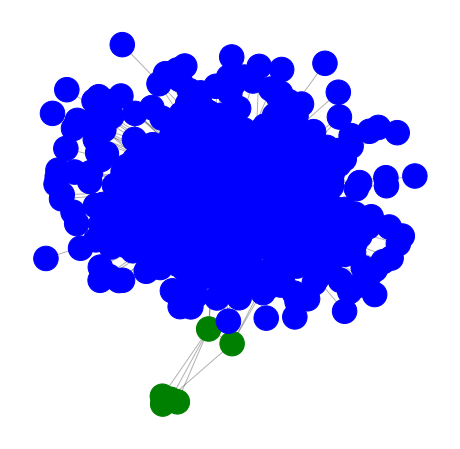

Girvan newman: Most performant communities
Number of communities 50


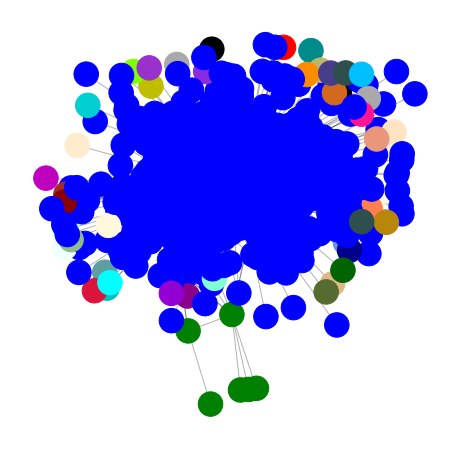

Spectral clustering: Most modular communities
Number of communities 11


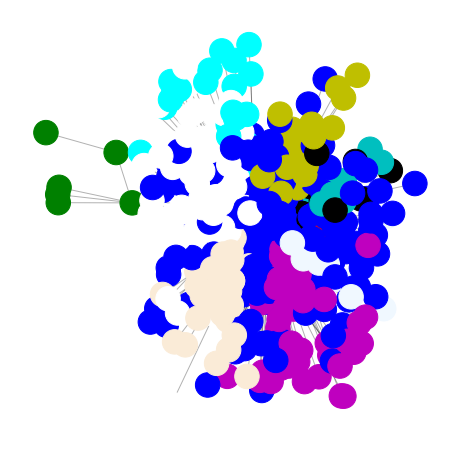

Spectral clustering: Most performant communities
Number of communities 49


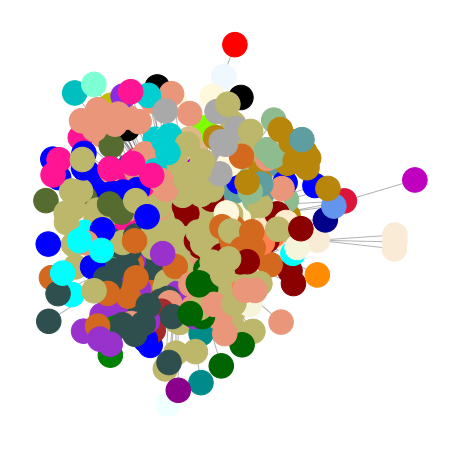

Modularity Maximization: Most modular communities
Number of communities 8


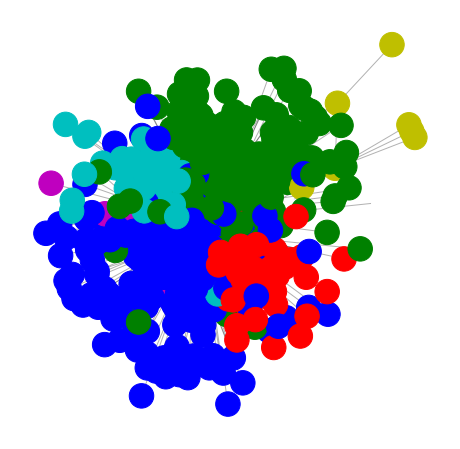

Modularity Maximization: Most performant communities
Number of communities 49


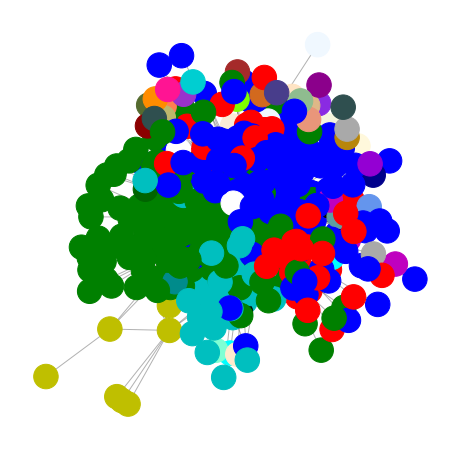

Ground truth partition
Number of communities 41


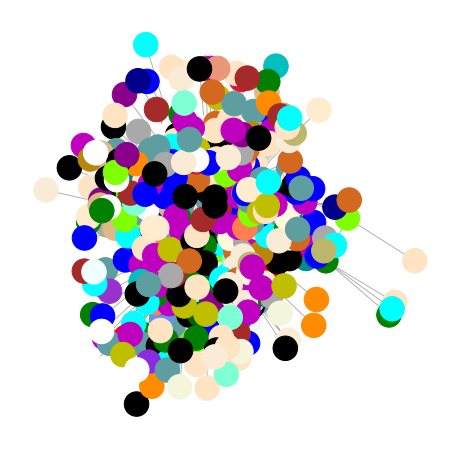

In [350]:
def plot_gtruth(G,partition):
    pos = nx.spring_layout(G)  # compute graph layout
    plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
    plt.axis('off')
    partval=[]
    for val in list(partition.values()):
        partval.append(colors[val])
    nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=partval)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)

eu,gmap = conv2int(eu,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_eu)}')
plot_communities(eu, max_mod_GN_eu)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_eu)}')
plot_communities(eu, max_perf_GN_eu)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_eu)}')
plot_communities(eu, max_mod_spectral_eu)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_eu)}')
plot_communities(eu, max_perf_spectral_eu)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_eu)}')
plot_communities(eu, max_mod_MM_eu)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_eu)}')
plot_communities(eu, max_perf_MM_eu)
print('Ground truth partition')
GTruth = dict()
with open("email-Eu-core-department-labels.txt") as f:
    for line in f:
        (key, val) = line.split()
        if int(key) in eu.nodes:
            GTruth[int(key)] = int(val)
print(f'Number of communities {max(GTruth.values())}')
plot_gtruth(eu,GTruth)

#### Οπτικοποίηση κοινοτήτων REG

Girvan newman: Most modular communities
Number of communities 8


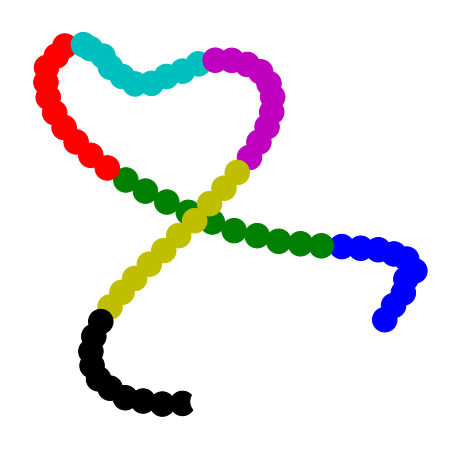

Girvan newman: Most performant communities
Number of communities 16


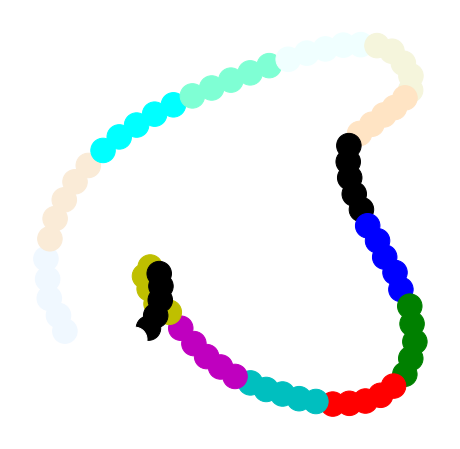

Spectral clustering: Most modular communities
Number of communities 7


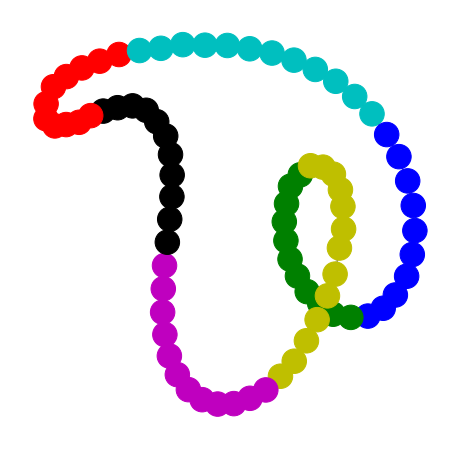

Spectral clustering: Most performant communities
Number of communities 23


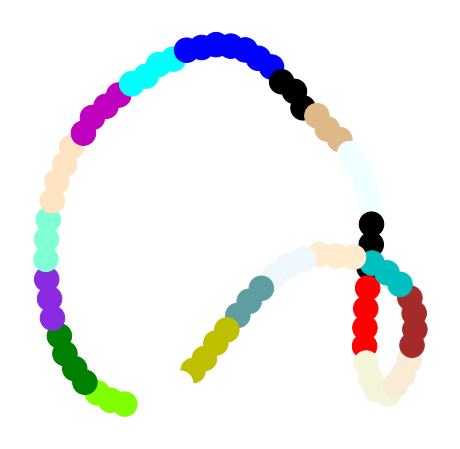

Modularity Maximization: Most modular communities
Number of communities 4


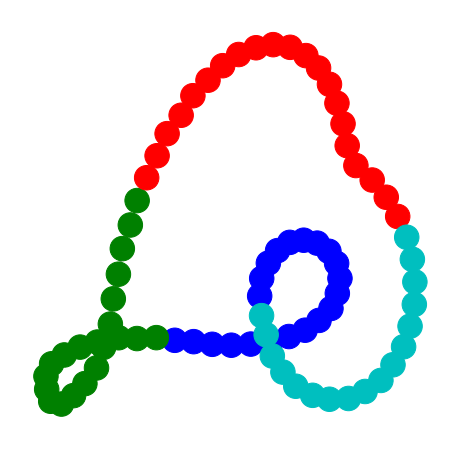

Modularity Maximization: Most performant communities
Number of communities 49


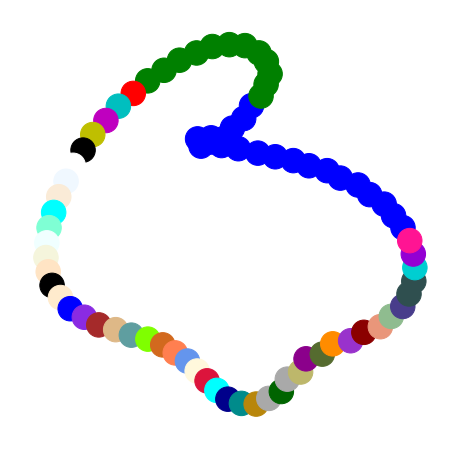

In [351]:
REG,gmap = conv2int(REG,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_REG)}')
plot_communities(REG, max_mod_GN_REG)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_REG)}')
plot_communities(REG, max_perf_GN_REG)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_REG)}')
plot_communities(REG, max_mod_spectral_REG)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_REG)}')
plot_communities(REG, max_perf_spectral_REG)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_REG)}')
plot_communities(REG, max_mod_MM_REG)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_REG)}')
plot_communities(REG, max_perf_MM_REG)

#### Οπτικοποίηση κοινοτήτων RGER

Girvan newman: Most modular communities
Number of communities 25


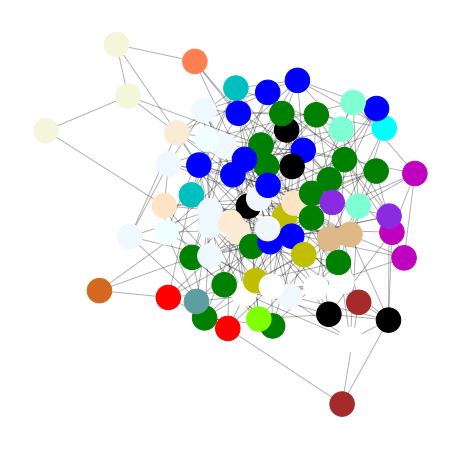

Girvan newman: Most performant communities
Number of communities 33


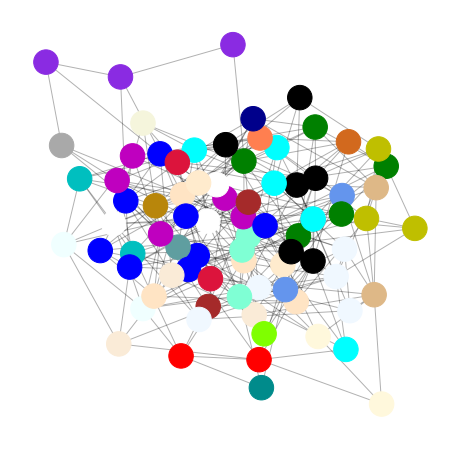

Spectral clustering: Most modular communities
Number of communities 9


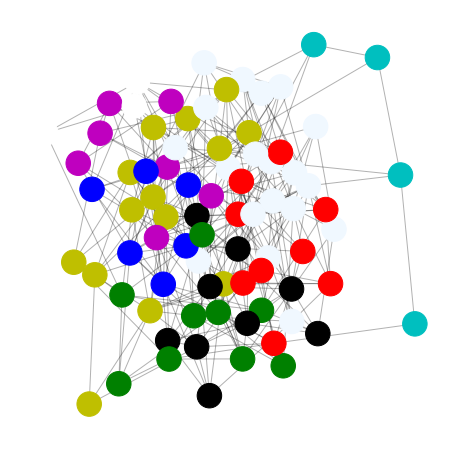

Spectral clustering: Most performant communities
Number of communities 27


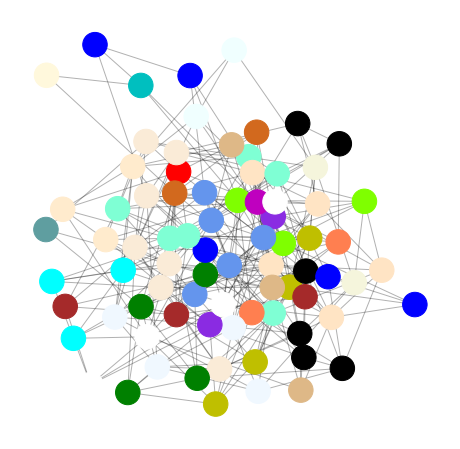

Modularity Maximization: Most modular communities
Number of communities 6


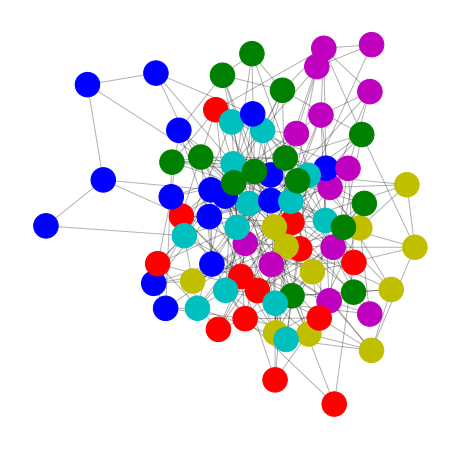

Modularity Maximization: Most performant communities
Number of communities 44


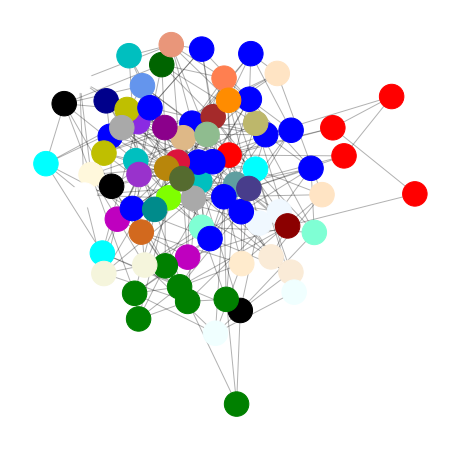

In [352]:
RGER,gmap = conv2int(RGER,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_RGER)}')
plot_communities(RGER, max_mod_GN_RGER)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_RGER)}')
plot_communities(RGER, max_perf_GN_RGER)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_RGER)}')
plot_communities(RGER, max_mod_spectral_RGER)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_RGER)}')
plot_communities(RGER, max_perf_spectral_RGER)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_RGER)}')
plot_communities(RGER, max_mod_MM_RGER)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_RGER)}')
plot_communities(RGER, max_perf_MM_RGER)

#### Οπτικοποίηση κοινοτήτων RGG

Girvan newman: Most modular communities
Number of communities 5


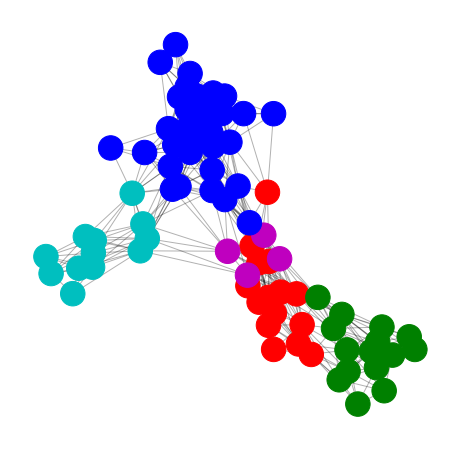

Girvan newman: Most performant communities
Number of communities 26


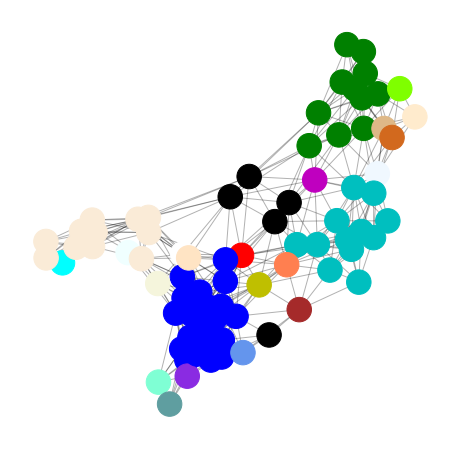

Spectral clustering: Most modular communities
Number of communities 4


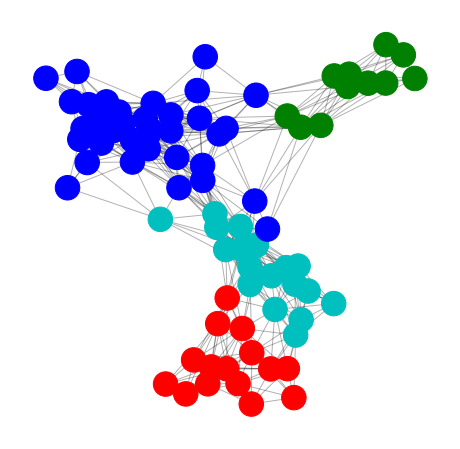

Spectral clustering: Most performant communities
Number of communities 10


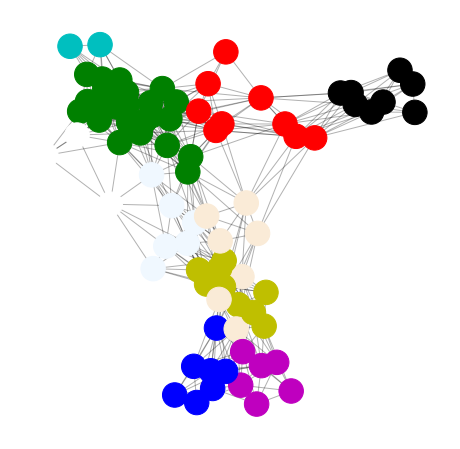

Modularity Maximization: Most modular communities
Number of communities 3


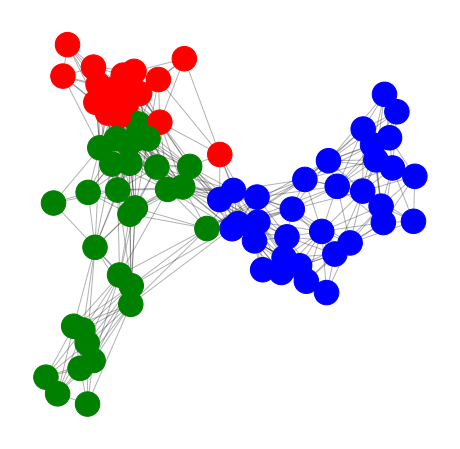

Modularity Maximization: Most performant communities
Number of communities 25


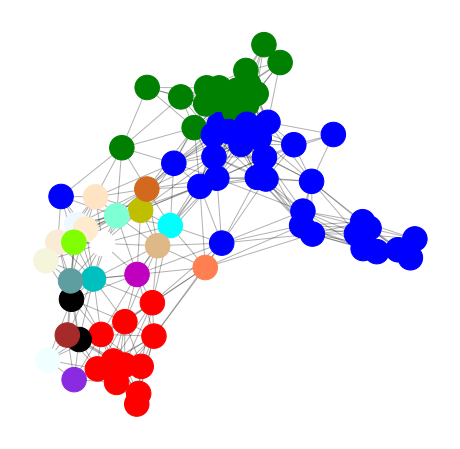

In [353]:
RGG,gmap = conv2int(RGG,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_RGG)}')
plot_communities(RGG, max_mod_GN_RGG)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_RGG)}')
plot_communities(RGG, max_perf_GN_RGG)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_RGG)}')
plot_communities(RGG, max_mod_spectral_RGG)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_RGG)}')
plot_communities(RGG, max_perf_spectral_RGG)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_RGG)}')
plot_communities(RGG, max_mod_MM_RGG)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_RGG)}')
plot_communities(RGG, max_perf_MM_RGG)

#### Οπτικοποίηση κοινοτήτων SW

Girvan newman: Most modular communities
Number of communities 7


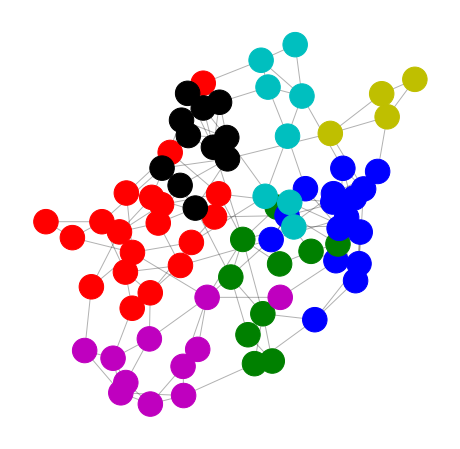

Girvan newman: Most performant communities
Number of communities 31


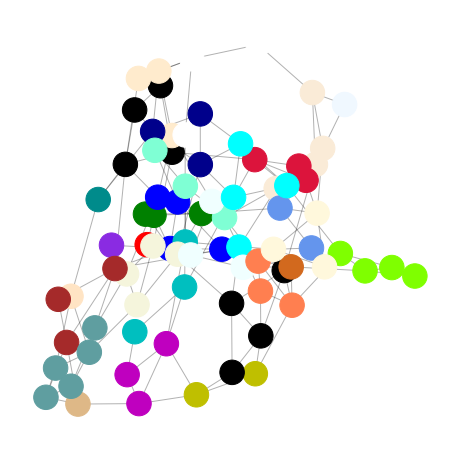

Spectral clustering: Most modular communities
Number of communities 8


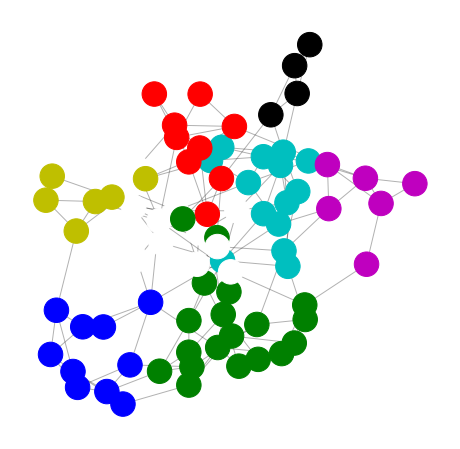

Spectral clustering: Most performant communities
Number of communities 29


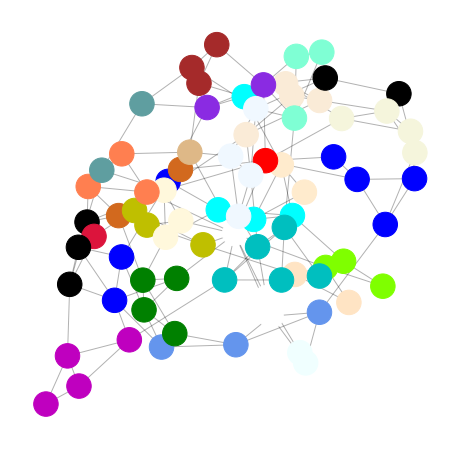

Modularity Maximization: Most modular communities
Number of communities 9


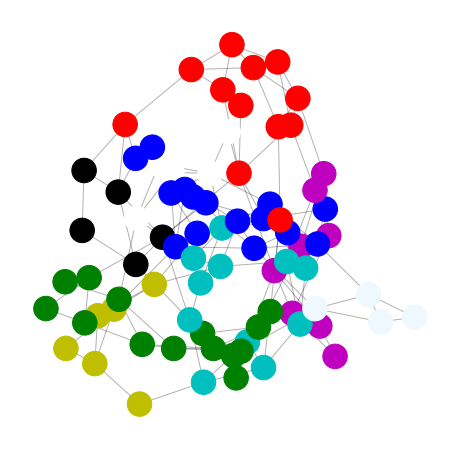

Modularity Maximization: Most performant communities
Number of communities 38


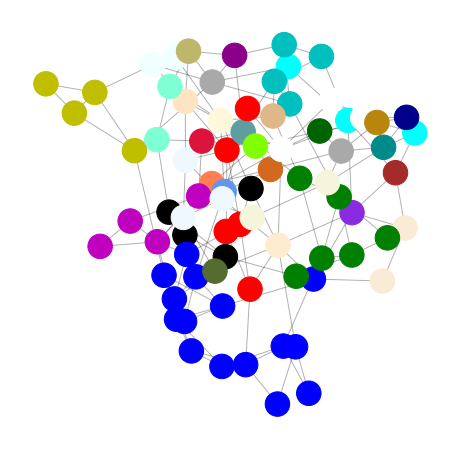

In [354]:
SW,gmap = conv2int(SW,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_SW)}')
plot_communities(SW, max_mod_GN_SW)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_SW)}')
plot_communities(SW, max_perf_GN_SW)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_SW)}')
plot_communities(SW, max_mod_spectral_SW)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_SW)}')
plot_communities(SW, max_perf_spectral_SW)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_SW)}')
plot_communities(SW, max_mod_MM_SW)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_SW)}')
plot_communities(SW, max_perf_MM_SW)

#### Οπτικοποίηση κοινοτήτων SF

Girvan newman: Most modular communities
Number of communities 36


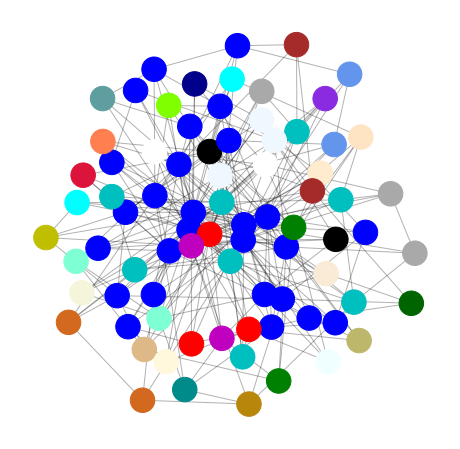

Girvan newman: Most performant communities
Number of communities 50


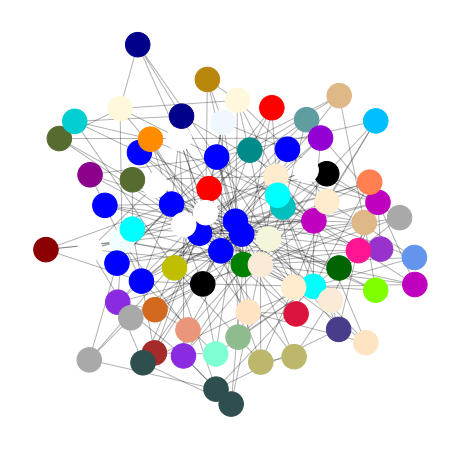

Spectral clustering: Most modular communities
Number of communities 12


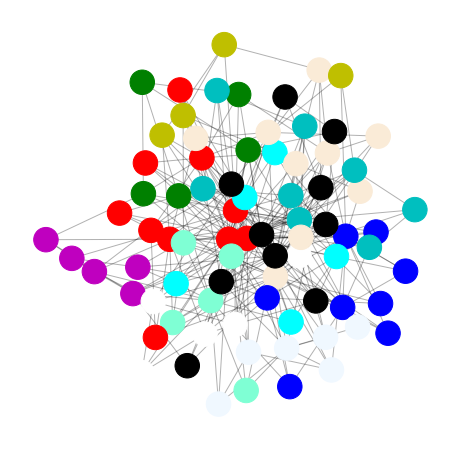

Spectral clustering: Most performant communities
Number of communities 23


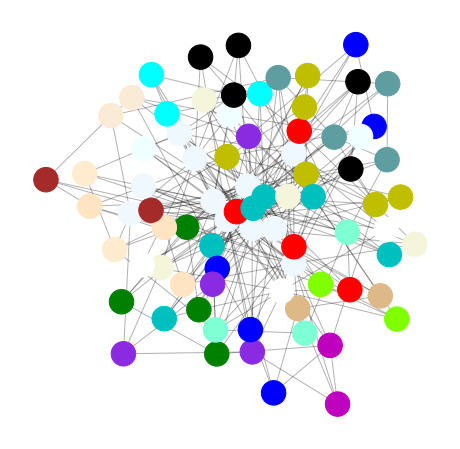

Modularity Maximization: Most modular communities
Number of communities 5


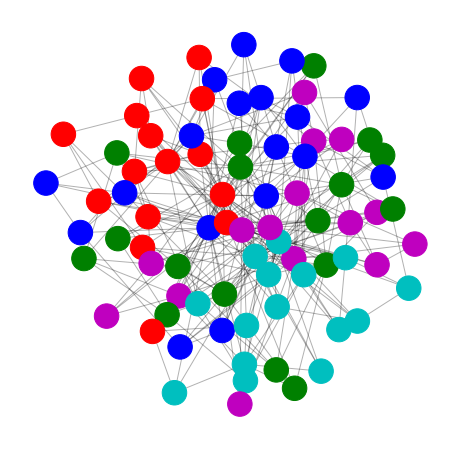

Modularity Maximization: Most performant communities
Number of communities 41


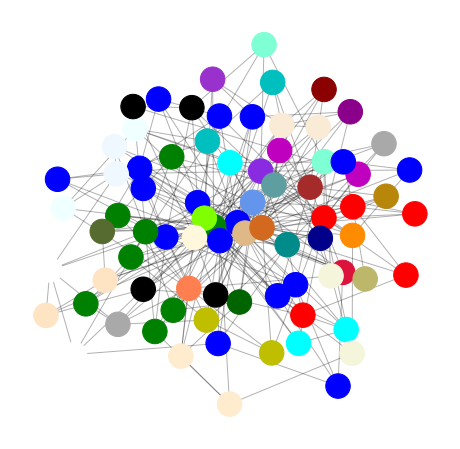

In [355]:
SF,gmap = conv2int(SF,0)
print('Girvan newman: Most modular communities')
print(f'Number of communities {len(max_mod_GN_SF)}')
plot_communities(SF, max_mod_GN_SF)
print('Girvan newman: Most performant communities')
print(f'Number of communities {len(max_perf_GN_SF)}')
plot_communities(SF, max_perf_GN_SF)

print('Spectral clustering: Most modular communities')
print(f'Number of communities {len(max_mod_spectral_SF)}')
plot_communities(SF, max_mod_spectral_SF)
print('Spectral clustering: Most performant communities')
print(f'Number of communities {len(max_perf_spectral_SF)}')
plot_communities(SF, max_perf_spectral_SF)

print('Modularity Maximization: Most modular communities')
print(f'Number of communities {len(max_mod_MM_SF)}')
plot_communities(SF, max_mod_MM_SF)
print('Modularity Maximization: Most performant communities')
print(f'Number of communities {len(max_perf_MM_SF)}')
plot_communities(SF, max_perf_MM_SF)

### Συνοπτικά: 

Το μέγιστο modularity score τείνει να επιστρέφει χαμηλότερο αριθμό communities από ότι το μέγιστο performance score.

Από τους 3 αλγορίθμους αναζήτησης κοινοτήτων ο spectral clustering ήταν ο πιο σύντομος, ο οποίος στον υπολογιστή μου χρειάστηκε λιγότερο από 1 λεπτό για να τερματίσει σε όλα τα παραδείγματα.
Αντιθέτως ο Newman Girvan ήταν ο πιο αργός, όπου μόνο για το eu-core χρειάστηκε χρειάστηκε περίπου 7-10 λεπτά.

Για τον δίκτυο american football, οι πιο modular κοινότητες που παράχθηκαν από τον NG και τον SpectralClustering
φαίνονται πλησιέστερες στη πραγματικότητα συγκριτικά με τα υπόλοιπα αποτελέσματα
Παράλληλα όμως, τα πιο modular communities που παράχθηκαν από το Modularity Maximization φαίνονται πιο καθαρά, και ίσως να είχε κάποια αλήθεια με την έννοια της γενίκευσης

Για το δίκτυο του game of thrones, οι πιο modular κοινότητες που παράχθηκαν περιστρέφονται γύρω από τους πρωταγωνιστές της σείρας
ενώ οι πιο performant βρίσκουν κοινότητες ακόμα και για τους πιο supporting χαρακτήρες. Οι πιο "καθαρές/ξεκάθαρες" κοινότητες
παράχθηκαν από τον NG και τον Spectral Clustering αλγόριθμο. Οπότε βάζοντας στις απαιτήσεις μας και τον χρόνο εκτέλεσης, θα
προτιμούσαμε τον Spectral Clustering αλγόριθμο για την εύρεση κοινοτήτων σε αυτό το dataset.


Θα περίμενε κανείς πως τα λιγότερα δυνατά clusters στο δίκτυο θα ήταν πιο κοντά στην πραγματικότητα, όπως προσεγγίζεται από το μέγιστο modularity score, ωστόσο από την ground truth διαμέριση
του eu-core παρατηρούμε πως προσεγγίστηκε πιο κοντά από τα most performant communities που παράχθηκαν και από τους 3 αλγορίθμους.
Από τα οποία, του SpectralClustering και του ModularityMaximization ήταν πιο κοντά στην προσέγγιση για 1 κοινότητα.


##### Για τα συνθετικά δίκτυα:

- REG: Ο Modularity maximization βρίσκει τα περισσότερα και τα λιγότερα δυνατά communities ως προς performance, modularity
- REG: Παρατηρούμε πως για κανέναν αλγόριθμο δεν βρίσκουμε consistent κοντινές κοινότητες, επικρατεί μια τυχαιότητα
- RGG: Επειδή υπάρχει η έννοια της χωρικότητας βλέπουμε πως οι αλγόριθμοί μας βρίσκουν κοινότητες με ευκολία όπου και οι πιο  performant κρατούσαν την ομαδοποιημένη μορφή και δεν βγάζει π.χ. 50 κοινότητες
- SW: Επικρατεί περίπου μια τυχαιότητα με εξαίρεση τις πιο modular κοινότητες του NG και του SpectralClustering.
- SF: Ο SpectralClustering και ο Modularity Maximization θεωρώ ότι έβγαλαν τις καλύτερες κοινότητες ως προς modularity καθώς στο scale free υποθέτω πως οι κοινότητες θα έπρεπε να περιφέρονται γύρω από τους "ισχυρούς" κόμβους